<a href="https://colab.research.google.com/github/Vibha-Yadav/Water-potability-data-analysis/blob/main/waterPotability_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df= pd.read_csv("/content/drive/MyDrive/water_potability.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.describe()
#Standard deviation: Measures the amount of variation or dispersion.
#25%, 50%, and 75% (Percentiles): for detection of outliers

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.duplicated().sum()

0

2.Exploratory data Analysis


<Axes: >

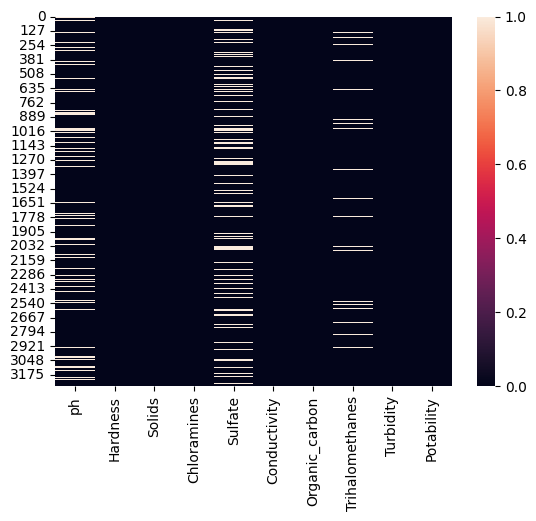

In [9]:
plt.Figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

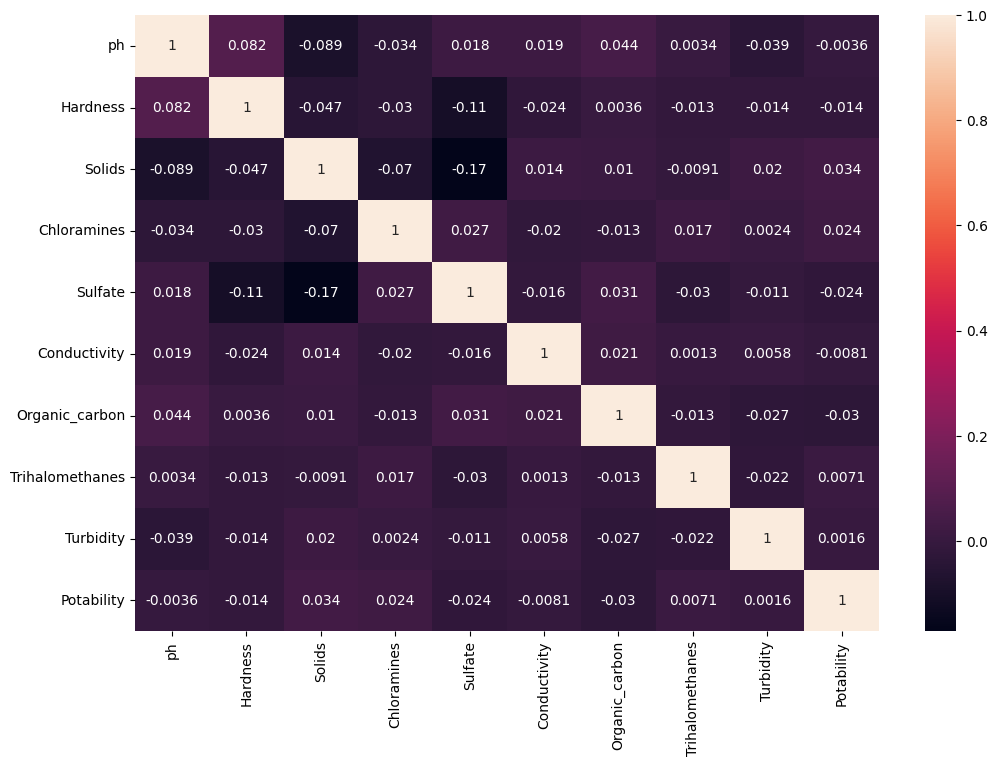

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Potability', ylabel='count'>

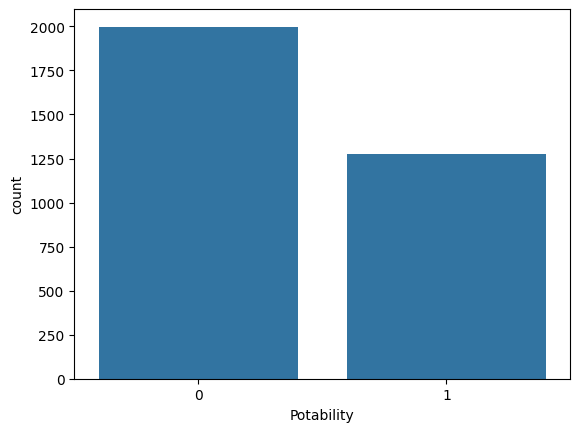

In [11]:
sns.countplot(x='Potability', data=df)

In [12]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [13]:
numerical_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

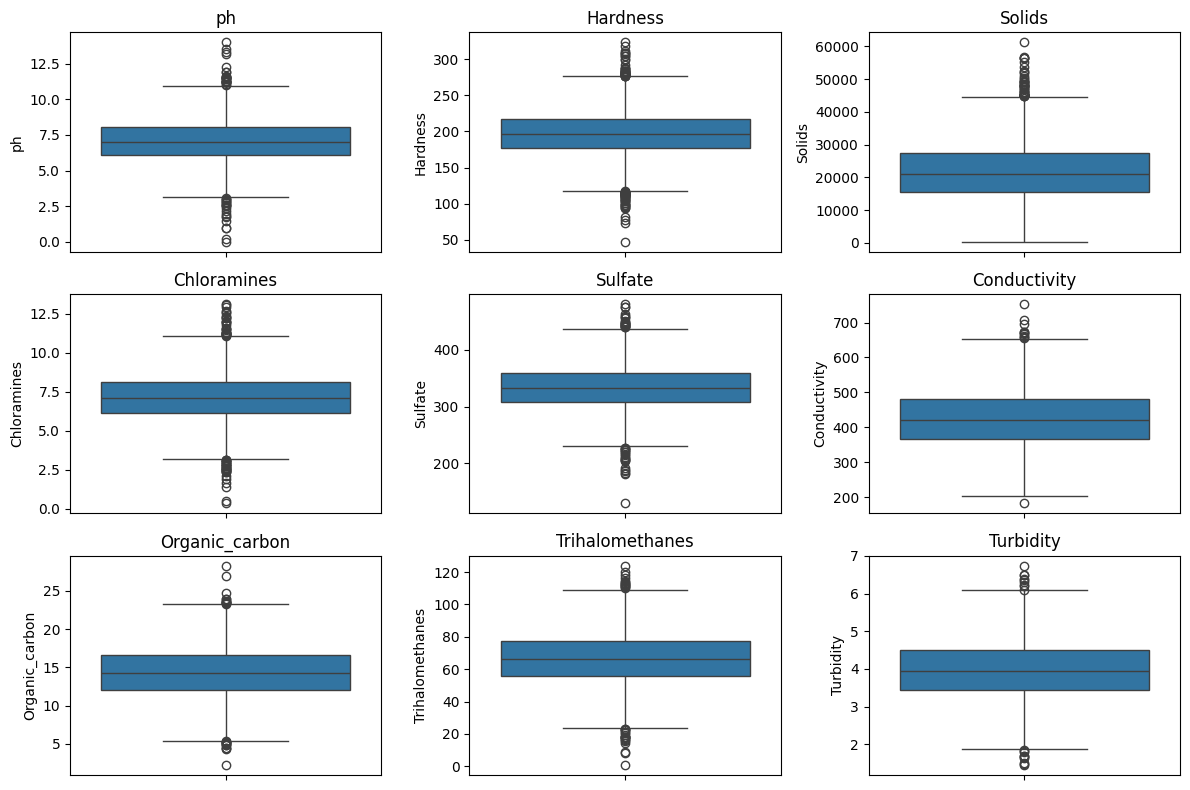

In [14]:
# visualization dataset also checking for outliers
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 3, numerical_features.index(feature) + 1)
    sns.boxplot(df[feature], orient='v')
    plt.title(feature)
plt.tight_layout()
plt.show()

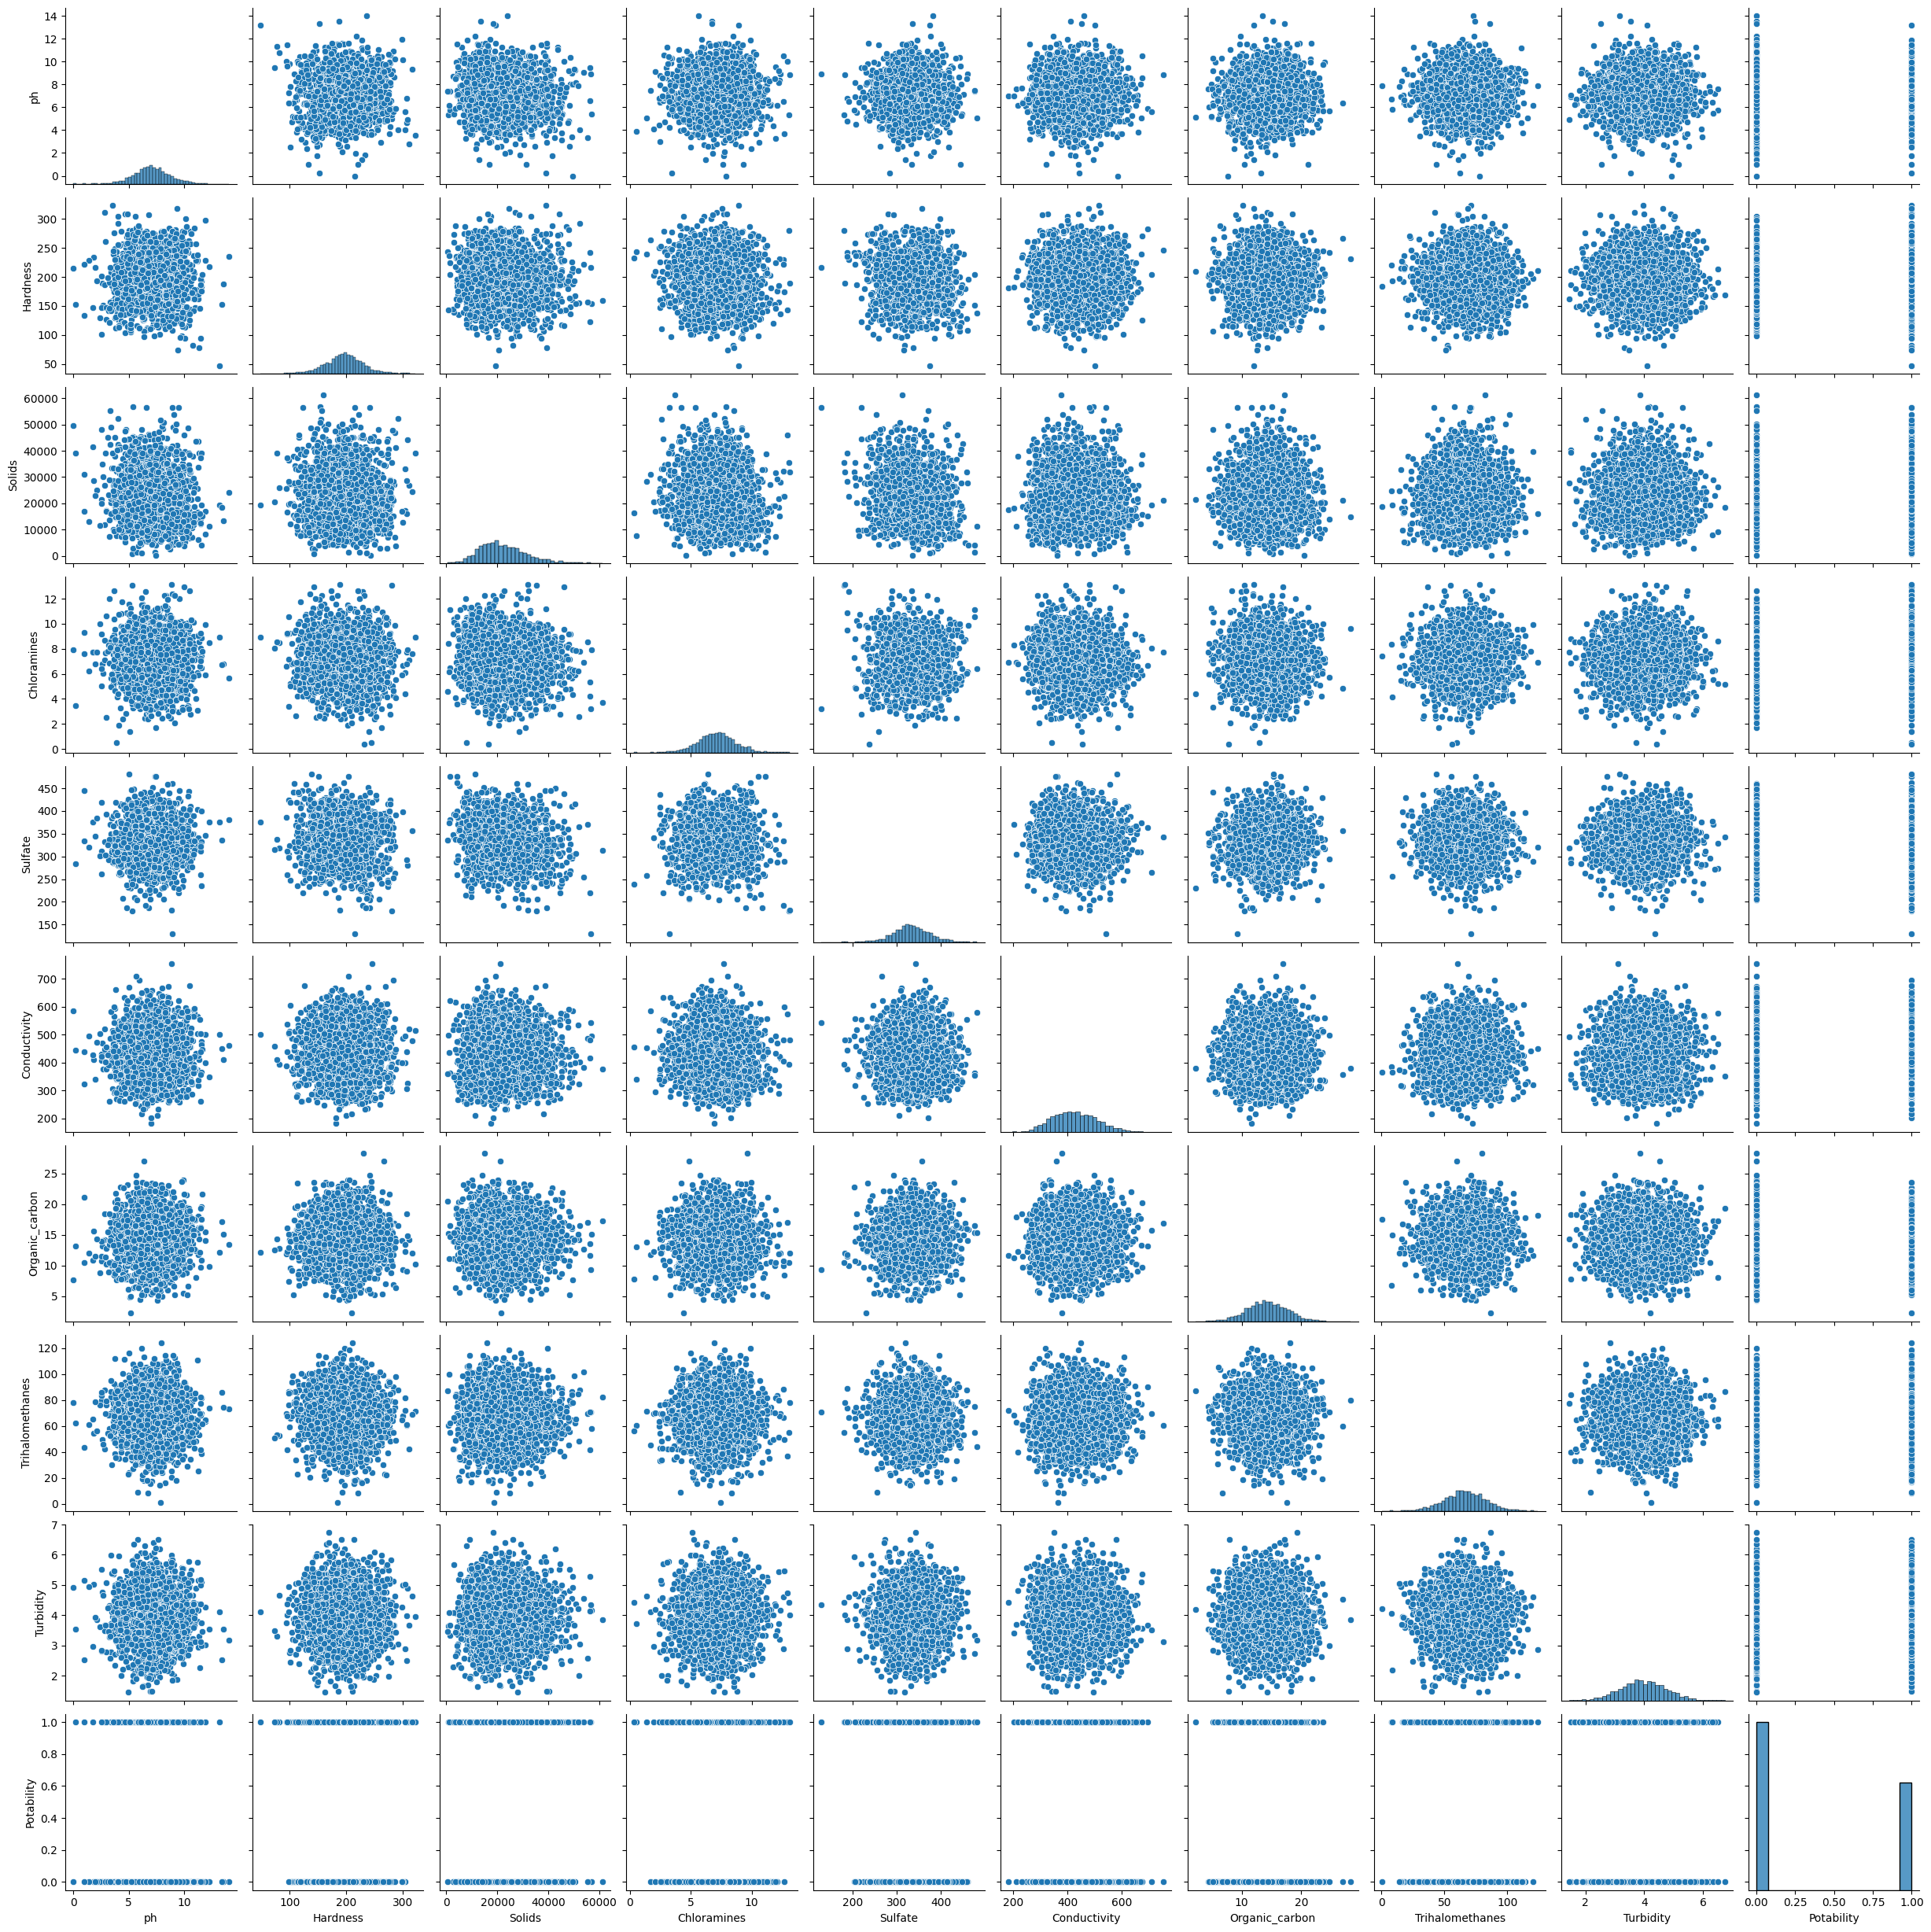

In [15]:
#pairplot
sns.pairplot(df)

In [16]:
fig= px.pie(df, names="Potability", hole=0.4, template='plotly_dark')
fig.show()


In [17]:
fig = px.scatter(df, x= 'ph', y='Sulfate', color='Potability', template='plotly_dark')
fig.show()

In [18]:
fig = px.scatter(df, x= 'Organic_carbon', y='Hardness', color='Potability', template='plotly_dark')
fig.show()

Text(0, 0.5, 'Percentage of missing values')

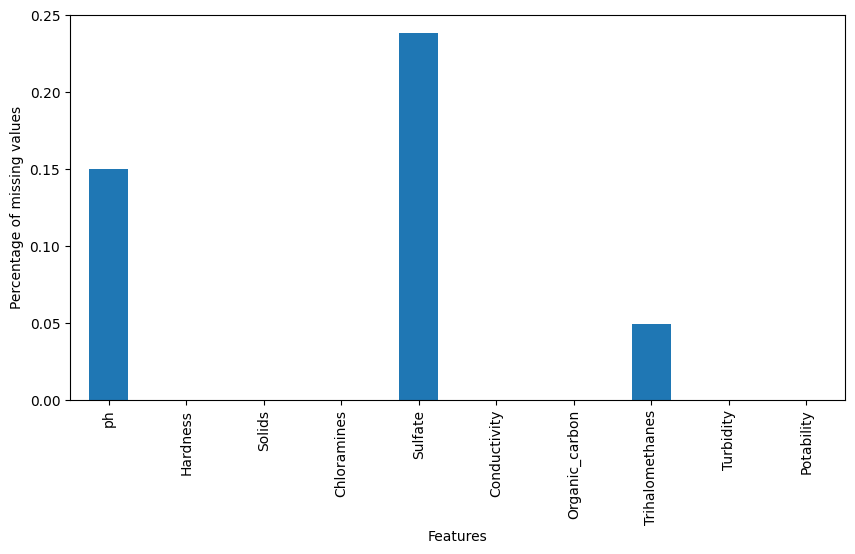

In [19]:
df.isnull().mean().plot.bar(figsize=(10,5))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")


In [20]:
# df['ph'] = df['ph'].fillna(df['ph'].median())
# df["Sulfate"]= df["Sulfate"].fillna(df['Sulfate'].median())
# df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())


Filling missing values by K-means clustering

In [21]:
from sklearn.cluster import KMeans
import numpy as np

features_with_missing_values = ['ph', 'Sulfate', 'Trihalomethanes']

df_no_missing = df.dropna()

X = df_no_missing.drop(columns=['Potability'])

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

cluster_labels = kmeans.predict(X)

cluster_centroids = kmeans.cluster_centers_

for idx, row in df.iterrows():
    if row.isnull().any():
        row_values = row.drop('Potability').values.reshape(1, -1)
        if np.isnan(row_values).any():
            for feature in features_with_missing_values:
                row_values[0][row.index.get_loc(feature)] = df[feature].median()
        nearest_cluster_idx = kmeans.predict(row_values)
        nearest_centroid = cluster_centroids[nearest_cluster_idx]
        for i, col in enumerate(df.columns):
            if pd.isnull(row[col]):
                df.at[idx, col] = nearest_centroid[0][i]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10

In [22]:
df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of outliers for each column:")
print(outliers)

Number of outliers for each column:
ph                 142
Hardness            83
Solids              47
Chloramines         61
Sulfate            232
Conductivity        11
Organic_carbon      25
Trihalomethanes     54
Turbidity           19
Potability           0
dtype: int64


In [24]:
# Trim outliers
df_trimmed = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
# df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Display trimmed DataFrame
print(df_trimmed)



            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.088675  204.890455  20791.318981     7.300212  368.516441   
1     3.889107  129.422921  18630.057858     6.635246  336.823413   
2     8.099124  224.236259  19909.541732     9.275884  336.823413   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  44831.869873     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  335.821302   
3273  9.419510  175.762646  33155.578218     7.350233  330.690239   
3274  5.126763  230.603758  11983.869376     6.303357  341.091318   
3275  7.874671  195.102299  17404.177061     7.509306  335.821302   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [25]:
# Identify outliers
outliers = ((df_trimmed < lower_bound) | (df_trimmed > upper_bound)).sum()

print("Number of outliers for each column:")
print(outliers)

Number of outliers for each column:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [26]:
x=df.drop('Potability', axis=1)
y=df['Potability']

In [27]:
x.shape, y.shape

((3276, 9), (3276,))

In [28]:
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 5.24223422e-03,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614887e+00, -1.28629758e+00],
       [-2.28678045e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38370468e-01,  6.84217891e-01],
       [ 6.91945689e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.58269724e-03, -1.16736546e+00],
       ...,
       [ 1.58928292e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18809239e-01, -8.56006782e-01],
       [-1.32807737e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03501973e-01,  9.50797383e-01],
       [ 5.39407065e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80252676e-01, -2.12445866e+00]])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [30]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1, 20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    pred_knn = model_knn.predict(x_test)
    recall_score_knn = recall_score(y_test, pred_knn, average='macro')
    print(i, recall_score_knn)

1 0.593699853145697
2 0.5758585141456678
3 0.6015142526477539
4 0.5619219435340342
5 0.5938019703762777
6 0.5675481166665046
7 0.6004395903640236
8 0.5720801766141816
9 0.6027931493926456
10 0.5836631881971932
11 0.6085846551841514
12 0.5739280122151659
13 0.5801328496542603
14 0.569313285937971
15 0.577531291637085
16 0.5634391138169476
17 0.5723281756027347
18 0.5641101699036208
19 0.5881952481448703


In [32]:
model_knn = KNeighborsClassifier(n_neighbors=13)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
recall_score_knn = recall_score(y_test, pred_knn, average='macro')
print(recall_score_knn * 100)

58.013284965426024


# N fold cross validation



In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Set the range of k values
k_values = list(range(1, 20))

# Define the recall scorer
recall_scorer = make_scorer(recall_score, average='macro')

# Perform n-fold cross-validation for each k value
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation using recall score
    scores = cross_val_score(model_knn, x_train, y_train, cv=5, scoring=recall_scorer)

    # Print the average recall score for the current k value
    print(f'k={k}, Average Recall Score: {np.mean(scores)}')


k=1, Average Recall Score: 0.5627817716274393
k=2, Average Recall Score: 0.5528679359271907
k=3, Average Recall Score: 0.5665693566743487
k=4, Average Recall Score: 0.5597711967884156
k=5, Average Recall Score: 0.5721695224577101
k=6, Average Recall Score: 0.561685375971207
k=7, Average Recall Score: 0.569398759141104
k=8, Average Recall Score: 0.5620935004278863
k=9, Average Recall Score: 0.5733338425202501
k=10, Average Recall Score: 0.5581756444924086
k=11, Average Recall Score: 0.5701645088425314
k=12, Average Recall Score: 0.5640218437520028
k=13, Average Recall Score: 0.5664192999952157
k=14, Average Recall Score: 0.558888480787094
k=15, Average Recall Score: 0.5667941913310603
k=16, Average Recall Score: 0.5585363336036961
k=17, Average Recall Score: 0.5683159273216215
k=18, Average Recall Score: 0.5636691524015344
k=19, Average Recall Score: 0.5739794195957468


Preparing a plot of k-fold cross-validation accuracy versus the value of k

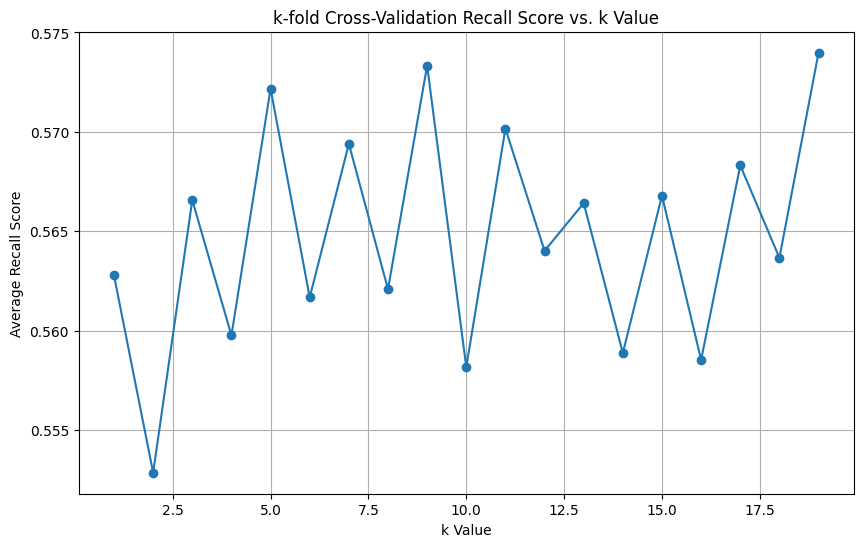

In [34]:
# Store cross-validation scores for each k
cv_scores = []

# Perform n-fold cross-validation for each k value
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation
    scores = cross_val_score(model_knn, x_train, y_train, cv=5, scoring=recall_scorer)

    # Store the average recall score for the current k value
    cv_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('k-fold Cross-Validation Recall Score vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Average Recall Score')
plt.grid(True)
plt.show()

3.Feature Importance Analysis: Random Forest Feature Importance or SHAP (SHapley Additive exPlanations) values to identify the most influential features for classification.

In [35]:
x = pd.DataFrame(x, columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])

In [36]:
from sklearn.ensemble import RandomForestClassifier



In [37]:
model_rf = RandomForestClassifier(n_estimators=13)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=13)

In [38]:
# Calculate feature importances
feature_importances = model_rf.feature_importances_

# Print feature importances
print("Feature Importances:")
for i, feature in enumerate(x.columns):
    print(f"{feature}: {feature_importances[i]}")


Feature Importances:
ph: 0.12773268228579918
Hardness: 0.12146830930090531
Solids: 0.1063859881037741
Chloramines: 0.10710518729205977
Sulfate: 0.1382417258149033
Conductivity: 0.10679251050091496
Organic_carbon: 0.10034031611209769
Trihalomethanes: 0.09433160594064197
Turbidity: 0.09760167464890375


5.Compare and contrast different evaluation metrics for classification (e.g., accuracy, precision, recall, F1-score) and regression (e.g., mean squared error, R-squared). Discuss the strengths and limitations of each metric and when to use them.

In [39]:
#evaluation metrics for knn model

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test,pred_knn)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, pred_knn)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, pred_knn)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, pred_knn)
print("F1-score:", f1)

Accuracy: 0.6371951219512195
Precision: 0.5755395683453237
Recall: 0.3088803088803089
F1-score: 0.40201005025125625


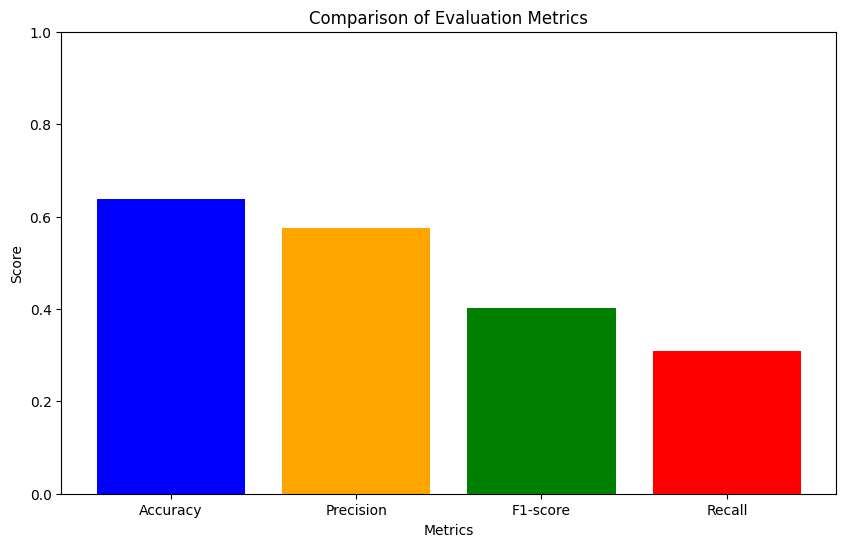

In [40]:
#comparing these metrices

metric_names = ['Accuracy', 'Precision', 'F1-score','Recall']
metric_values = [accuracy, precision, f1, recall]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistency
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_knn)

# Extract True Negatives, False Positives, False Negatives, True Positives
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Print the values
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)


True Negatives: 338
False Positives: 59
False Negatives: 179
True Positives: 80


9.Compare and contrast different types of data visualizations (e.g., histograms, scatter plots, heatmaps, boxplots etc.)

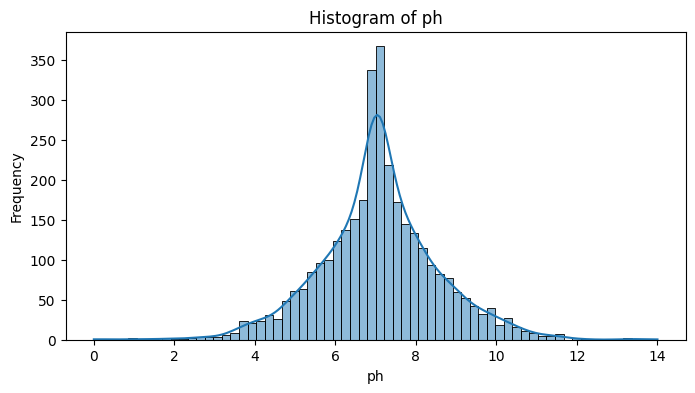

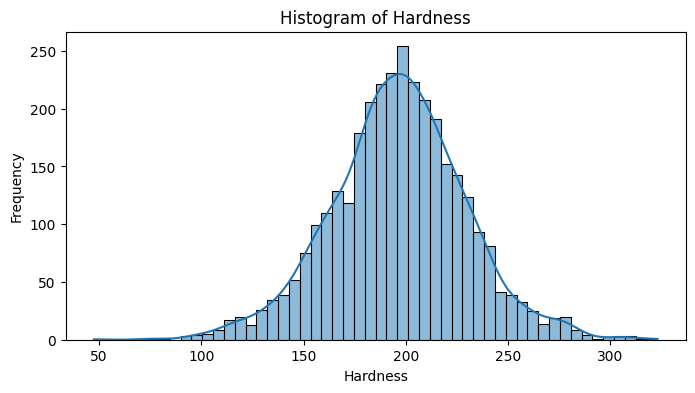

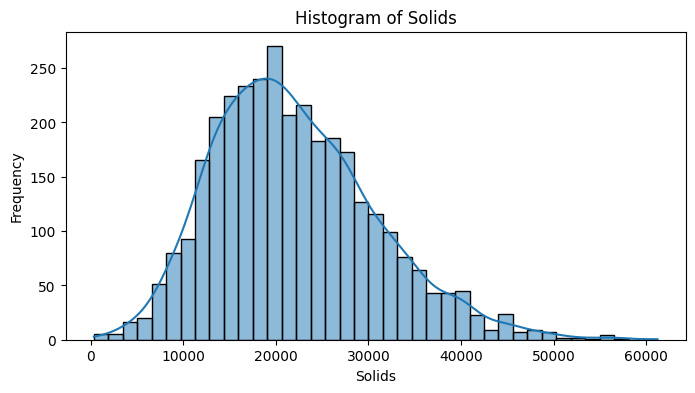

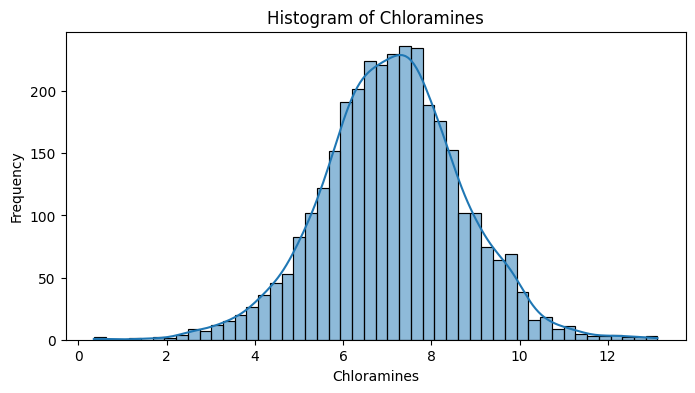

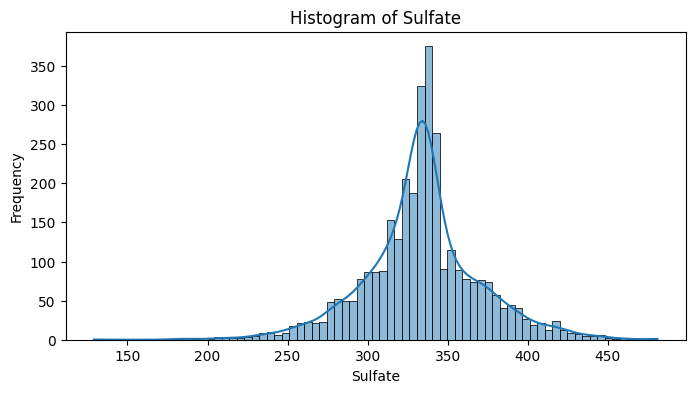

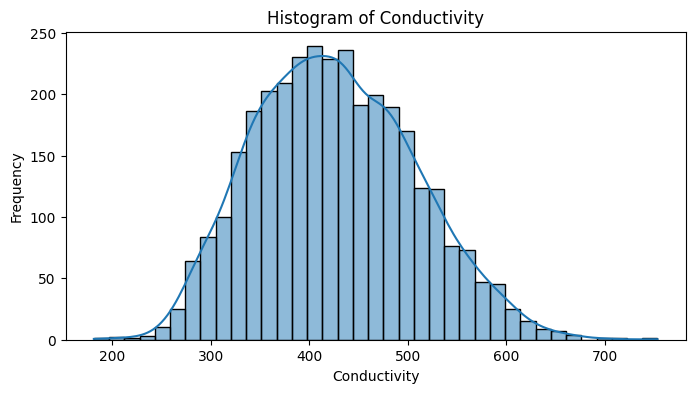

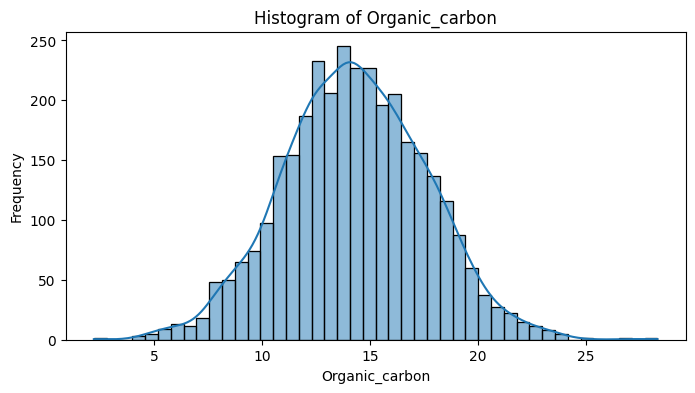

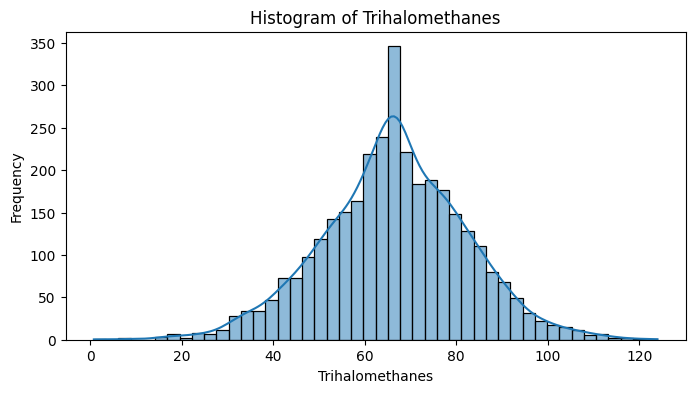

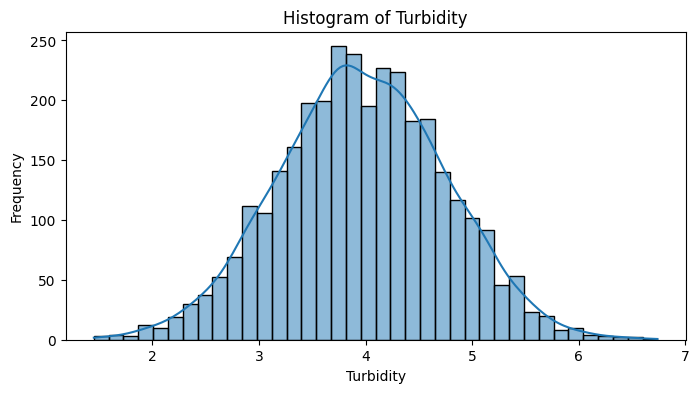

In [42]:
# Histograms for numerical features
numerical_features = x.select_dtypes(include=['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

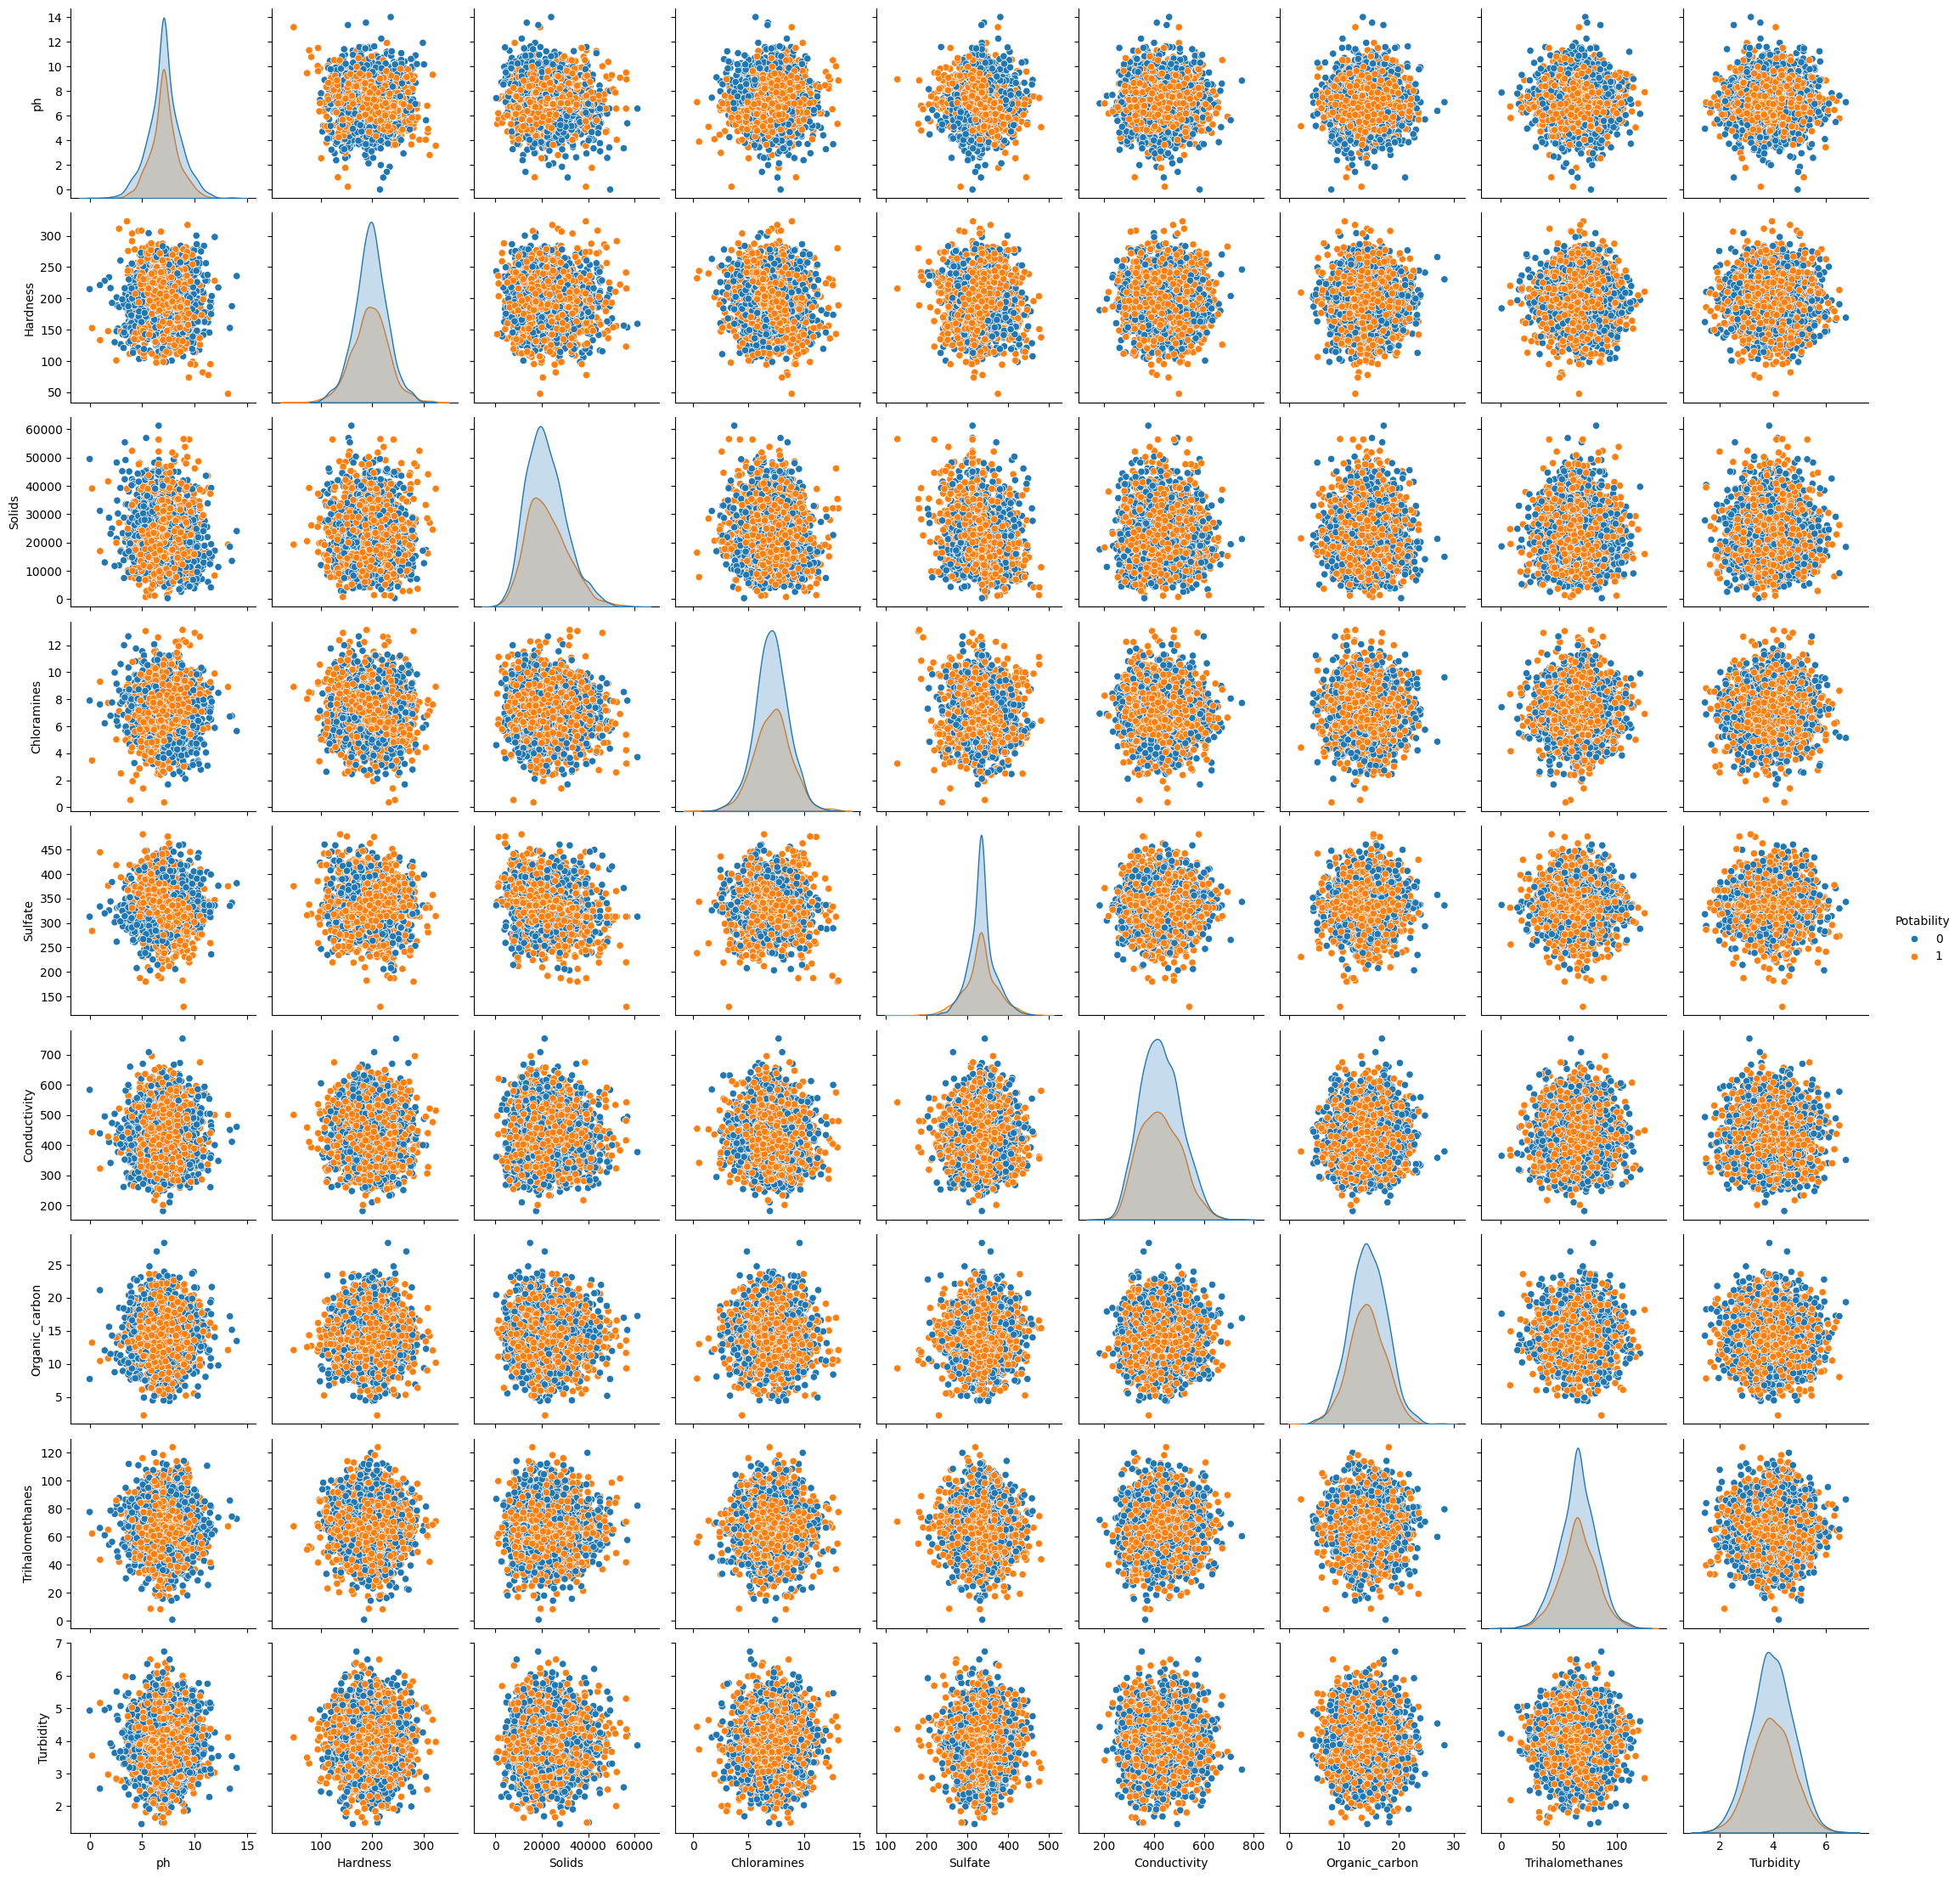

In [43]:
# Scatter plots for pairwise relationships between numerical features
sns.pairplot(df, hue='Potability', diag_kind='kde')
plt.show()

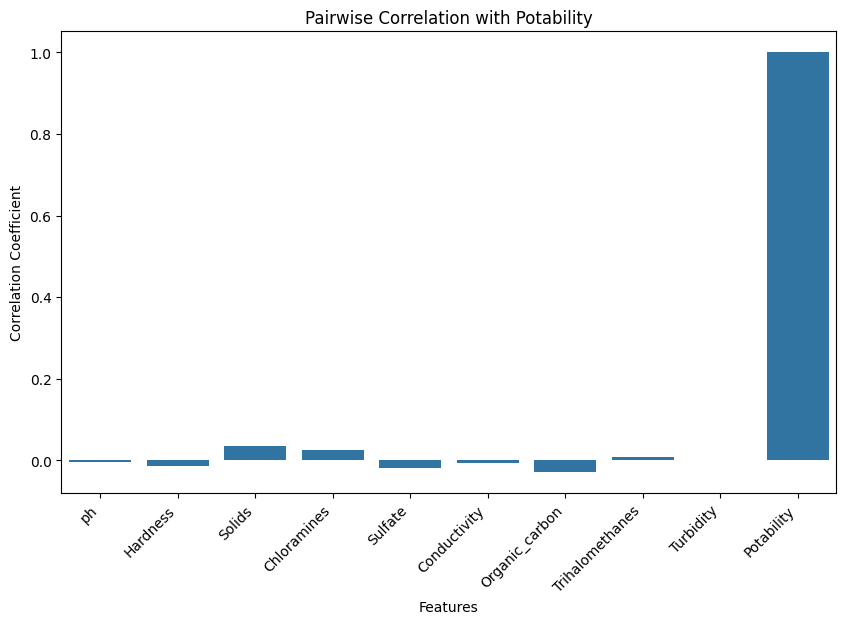

In [44]:
# Compute pairwise correlations
correlations = df.corrwith(df['Potability'])

# Plot correlation bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Pairwise Correlation with Potability')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

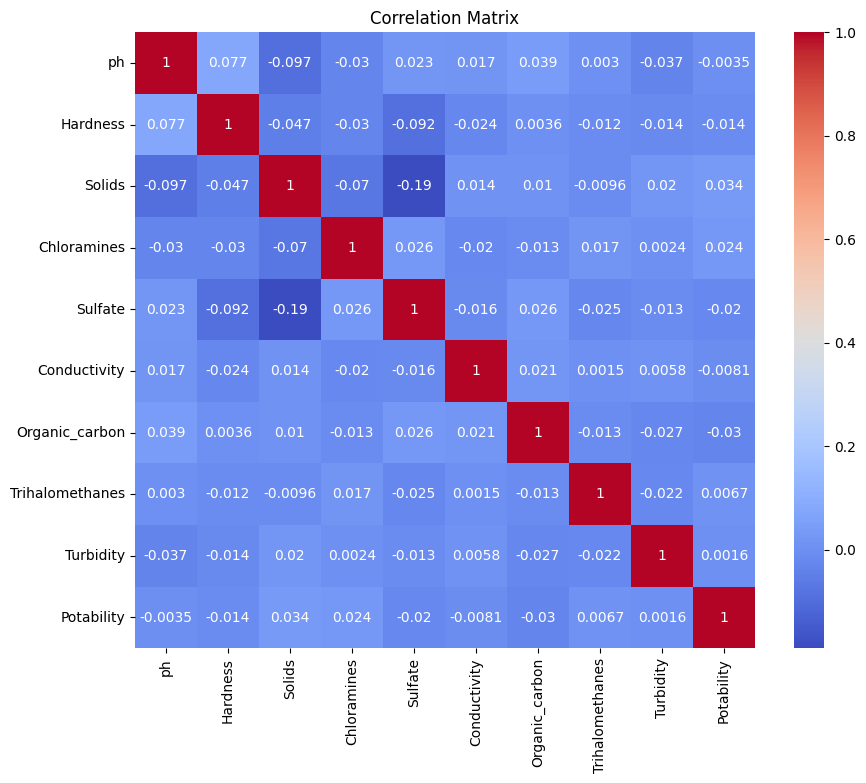

In [45]:
# Heatmap for correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

11.How different models ensure generalizability. Compare the generalization performance of different classifiers on a given dataset. Assess their robustness through train-test splitting and k-fold cross-validation, highlighting the most suitable model on your dataset

In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()

classifiers = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree}

# Train and evaluate classifiers using train-test split
print("Train-test split evaluation:")
for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"{name}: Recall = {recall:.4f}")

# Evaluate classifiers using k-fold cross-validation
kfold = StratifiedKFold(n_splits=13, shuffle=True)
print("\nK-fold cross-validation evaluation:")
for name, classifier in classifiers.items():
    cv_scores = cross_val_score(classifier, x, y, cv=kfold, scoring='recall_macro')
    print(f"{name}: Mean recall = {cv_scores.mean():.4f} (std = {cv_scores.std():.4f})")

Train-test split evaluation:
Logistic Regression: Recall = 0.5000
Decision Tree: Recall = 0.5608

K-fold cross-validation evaluation:
Logistic Regression: Mean recall = 0.4997 (std = 0.0009)
Decision Tree: Mean recall = 0.5661 (std = 0.0253)
